In [1]:
from keras import Model
# redefine model to output right after the first hidden layer
#model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [2]:
#!wget https://github.com/girishkuniyal/Cat-Dog-CNN-Classifier/blob/master/resources/dogcat_model_bak.h5


In [3]:
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import Adam

from warnings import filterwarnings
filterwarnings('ignore')

In [19]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 5)         1445      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 5)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 980)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [5]:
from keras.models import load_model

classifier.load_weights('/home/nsl48/DeepLearning_Guide/Keras_API/Cnn_Visualization/dogcat_model_bak.h5')

In [6]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

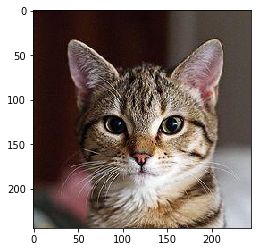

In [7]:
from keras_preprocessing import image
from matplotlib import pyplot as plt
import numpy as np

# img_path = '/content/Cat03.jpg'
img_path = '/home/nsl48/DeepLearning_Guide/Keras_API/Cnn_Visualization/cat.jpg'
#Input Image for Layer visualization
img1 = image.load_img(img_path)
plt.imshow(img1)

#preprocess image
img1 = image.load_img(img_path, target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [8]:
classifier.predict(img)

1/1 [==============================] - 0s 86ms/step


array([[0.9634523]], dtype=float32)

In [9]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']


In [10]:
from keras.models import Model

conv2d_11_output = Model(inputs=classifier.input, outputs=classifier.get_layer(model_layers[0]).output)
max_pooling2d_11_output = Model(inputs=classifier.input, outputs=classifier.get_layer(model_layers[1]).output)
conv2d_12_output = Model(inputs=classifier.input,outputs=classifier.get_layer(model_layers[2]).output)
max_pooling2d_12_output = Model(inputs=classifier.input, outputs=classifier.get_layer(model_layers[3]).output)

In [11]:
conv2d_11_features = conv2d_11_output.predict(img)
conv2d_12_features = conv2d_12_output.predict(img)
print('1st conv layer feature output shape : ',conv2d_11_features.shape)
print('2nd conv layer feature output shape : ',conv2d_12_features.shape)


max_pool_11_featues = max_pooling2d_11_output.predict(img)
max_pool_12_featues = max_pooling2d_12_output.predict(img)
print('1st max pool layer feature output shape:', max_pool_11_featues.shape)
print('2nd max pool layer feature output shape:', max_pool_12_featues.shape)

1/1 [==============================] - 0s 30ms/step
1st conv layer feature output shape :  (1, 62, 62, 32)
2nd conv layer feature output shape :  (1, 29, 29, 32)
1/1 [==============================] - 0s 33ms/step
1st max pool layer feature output shape: (1, 31, 31, 32)
2nd max pool layer feature output shape: (1, 14, 14, 32)


(1, 62, 62, 32)


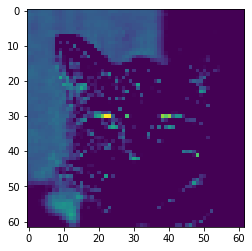

In [12]:
# show filter 4 image
plt.imshow(conv2d_11_features[0, :, :, 4])
print(conv2d_11_features.shape)

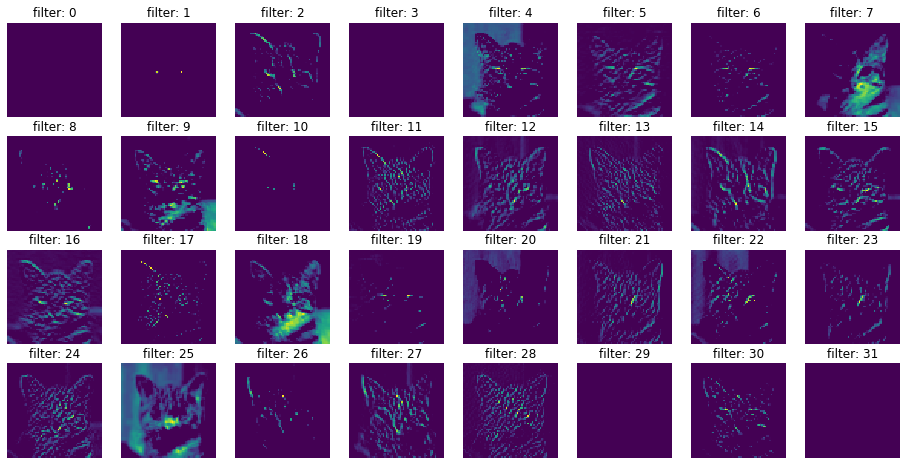

In [13]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_11_features[0, :, :, i])
plt.show()

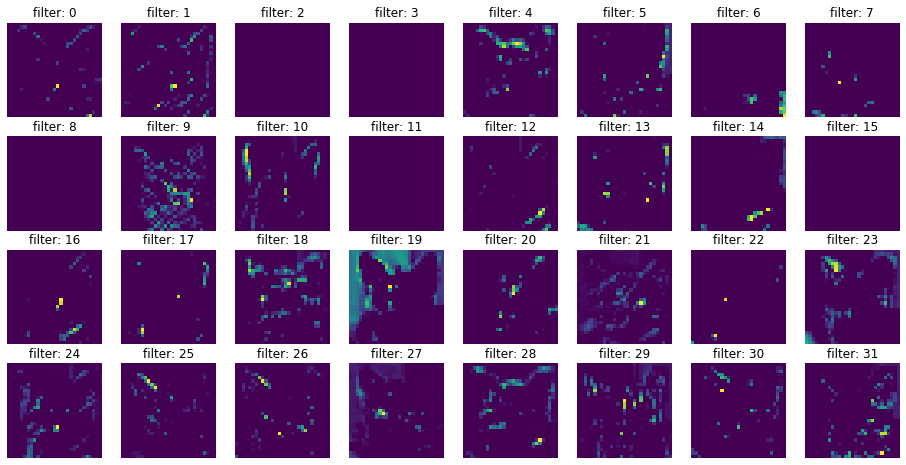

In [14]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_12_features[0, :, :, i])
plt.show()

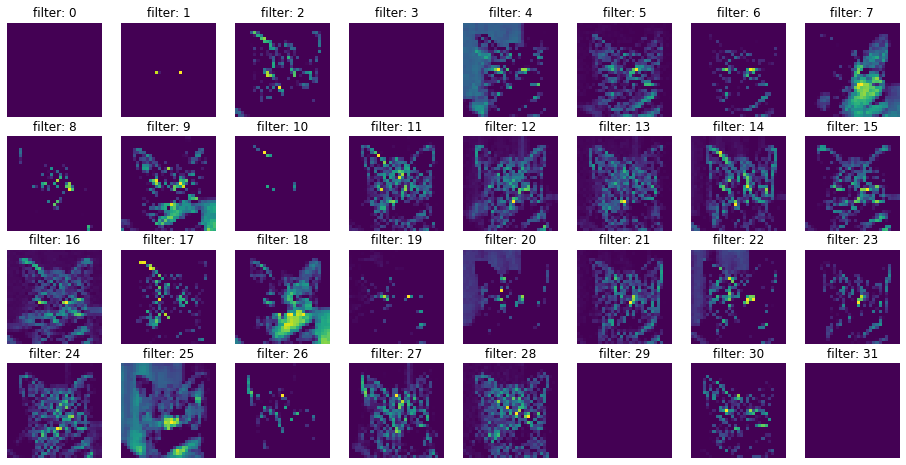

In [15]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(max_pool_11_featues[0, :, :, i])
plt.show()

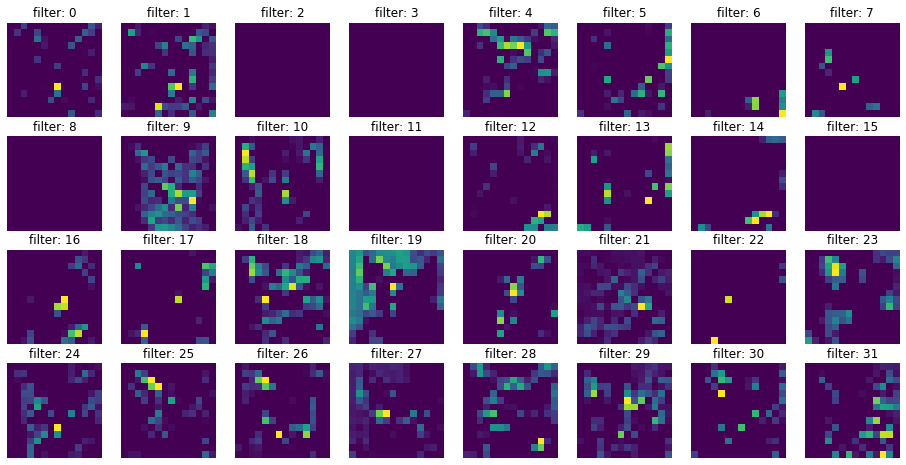

In [16]:
# 2nd max poo
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(max_pool_12_featues[0, :, :, i])
plt.show()

In [17]:
dense_11_output = Model(inputs=classifier.input, outputs=classifier.get_layer(model_layers[5]).output)
dense_11_featues = dense_11_output.predict(img)
print('dense_11_feature_shape', dense_11_featues.shape)

1/1 [==============================] - 0s 39ms/step
dense_11_feature_shape (1, 128)


In [18]:
print(dense_11_featues[0].flatten())

[ 0.          0.          0.          0.          0.          0.
  0.         36.451313    0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  3.6572804   0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 15.211287    0.          9.195008    0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         15.807315    0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.9712842   0.          0.          0.          0.          0.
  0.          8.74        0.          0.          0.          0.
  0.          0.          0.84003204 12.387519    0.          0.
  0.          0.         